In [8]:
%load_ext lab_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [2]:
df_plot = pd.read_csv("tstats-analysis.csv")

In [3]:
df_plot

,method,trait,rep_i,n_pos,n_neg,n_discovery,tstats,meanshift
0,top-100-zscore.uniform,UKB_460K.blood_RBC_DISTRIB_WIDTH,0,14,24,0,0.707341,0.236400
1,top-100-zscore.uniform,UKB_460K.blood_RBC_DISTRIB_WIDTH,1,13,31,0,-1.334570,-0.331383
2,top-100-zscore.uniform,UKB_460K.blood_RBC_DISTRIB_WIDTH,2,15,27,0,0.475424,0.188571
3,top-100-zscore.uniform,UKB_460K.blood_RBC_DISTRIB_WIDTH,3,18,20,0,-2.907919,-0.795081
4,top-100-zscore.uniform,UKB_460K.blood_RBC_DISTRIB_WIDTH,4,17,34,0,-2.577916,-0.737030
...,...,...,...,...,...,...,...,...
15995,fdr5-2000-uniform.vs,UKB_460K.bp_SYSTOLICadjMEDz,15,46,71,122,3.586464,1.203908
15996,fdr5-2000-uniform.vs,UKB_460K.bp_SYSTOLICadjMEDz,16,37,76,145,4.635282,1.482270
15997,fdr5-2000-uniform.vs,UKB_460K.bp_SYSTOLICadjMEDz,17,57,71,107,3.639310,1.014739
15998,fdr5-2000-uniform.vs,UKB_460K.bp_SYSTOLICadjMEDz,18,48,80,128,7.567934,2.110642


In [4]:
# normalize by the maximum statistics by trait, rep_i
df_plot_normalized = []
for (trait, rep_i), df_group in df_plot.groupby(["trait", "rep_i"]):
    for col in ["n_discovery", "tstats", "meanshift"]:
        df_group[col] /= df_group[col].max()
    df_plot_normalized.append(df_group)
df_plot_normalized = pd.concat(df_plot_normalized)

# then average across trait for each `method` and `rep_i`
df_plot = df_plot_normalized.groupby(["method", "rep_i"]).mean().reset_index()

In [10]:
df_plot["gwas_weight"] = df_plot["method"].apply(lambda x: x.split(".")[0])
df_plot["sc_weight"] = df_plot["method"].apply(lambda x: x.split(".")[1])

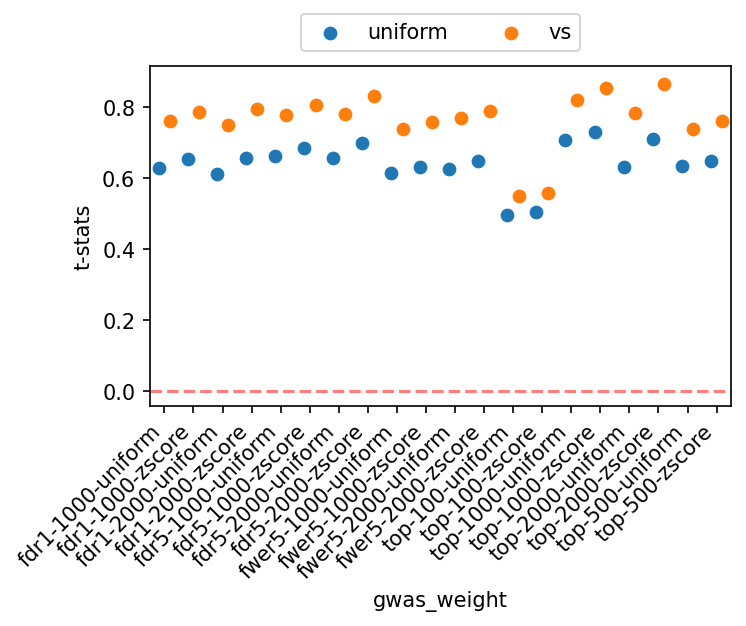

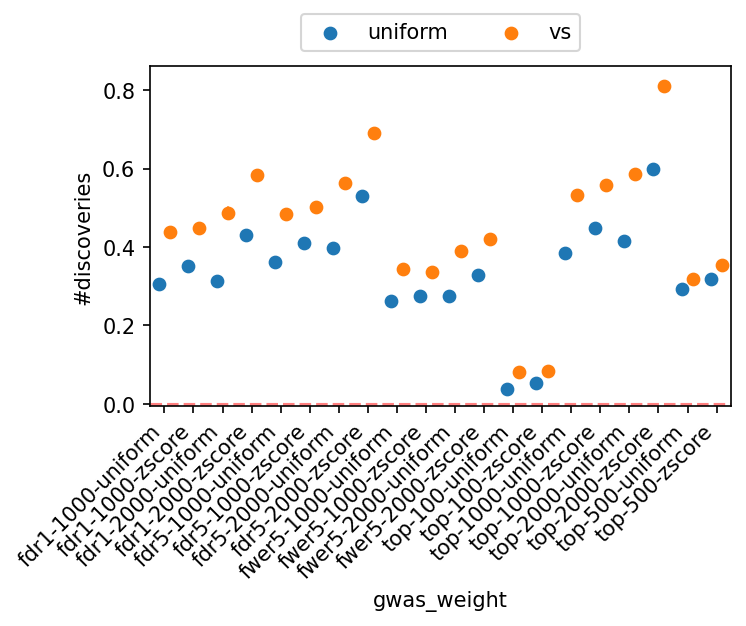

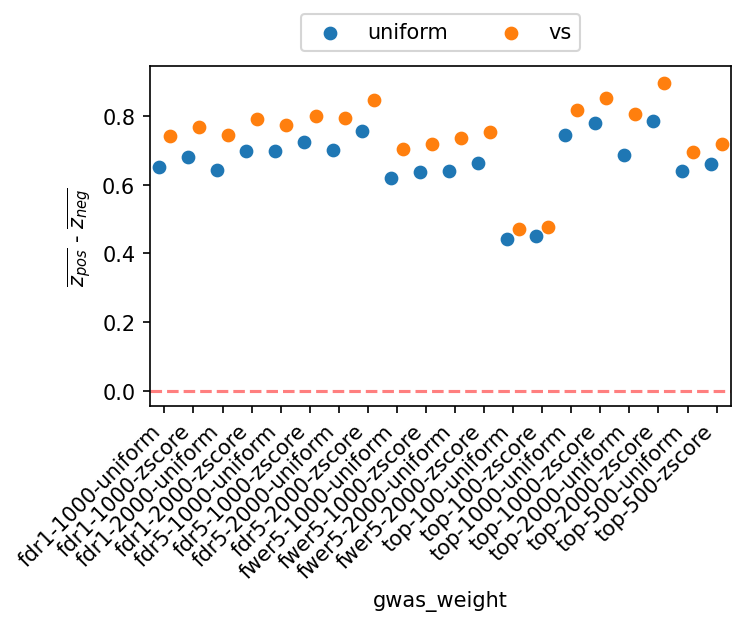

In [11]:
for y in ["tstats", "n_discovery", "meanshift"]:
    fig, ax = plt.subplots(figsize=(5, 3), dpi=150)
    sns.pointplot(
        data=df_plot,
        x="gwas_weight",
        y=y,
        hue="sc_weight",
        errwidth=0.75,
        join=False,
        scale=0.75,
        dodge=0.4,
        ax=ax,
    )
    ax.legend(loc="center", bbox_to_anchor=[0.5, 1.1], ncol=2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    if y == "tstats":
        ax.set_ylabel("t-stats")
    elif y == "n_discovery":
        ax.set_ylabel("#discoveries")
    elif y == "meanshift":
        ax.set_ylabel("$\\overline{z_{pos}}$ - $\\overline{z_{neg}}$")
    else:
        raise NotImplementedError
    ax.axhline(y=0, ls="--", color="red", alpha=0.5)

In [15]:
df_plot.groupby("method").mean().sort_values("tstats")

,rep_i,n_pos,n_neg,n_discovery,tstats,meanshift
method,,,,,,
top-100-uniform.uniform,9.5,144.32,135.725,0.037661,0.494992,0.442120
top-100-zscore.uniform,9.5,144.32,135.725,0.052335,0.503352,0.449185
top-100-uniform.vs,9.5,144.32,135.725,0.081025,0.548955,0.471551
top-100-zscore.vs,9.5,144.32,135.725,0.084988,0.556894,0.477833
fdr1-2000-uniform.uniform,9.5,144.32,135.725,0.314273,0.612038,0.642748
fwer5-1000-uniform.uniform,9.5,144.32,135.725,0.263284,0.614468,0.619023
fwer5-2000-uniform.uniform,9.5,144.32,135.725,0.275792,0.627298,0.638166
fdr1-1000-uniform.uniform,9.5,144.32,135.725,0.306805,0.628639,0.650243
fwer5-1000-zscore.uniform,9.5,144.32,135.725,0.273885,0.630244,0.636323


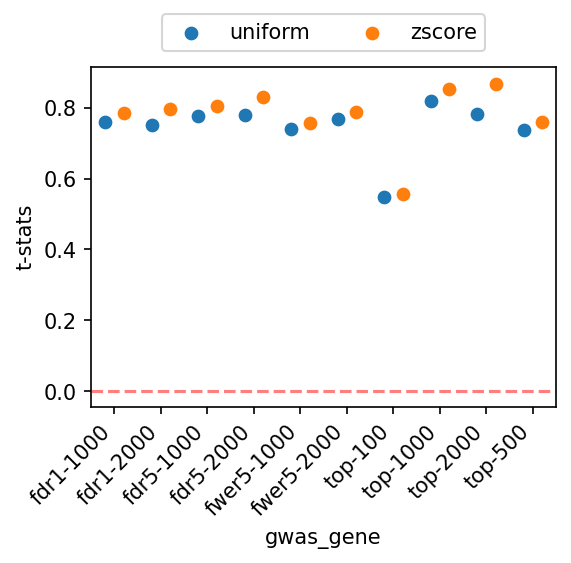

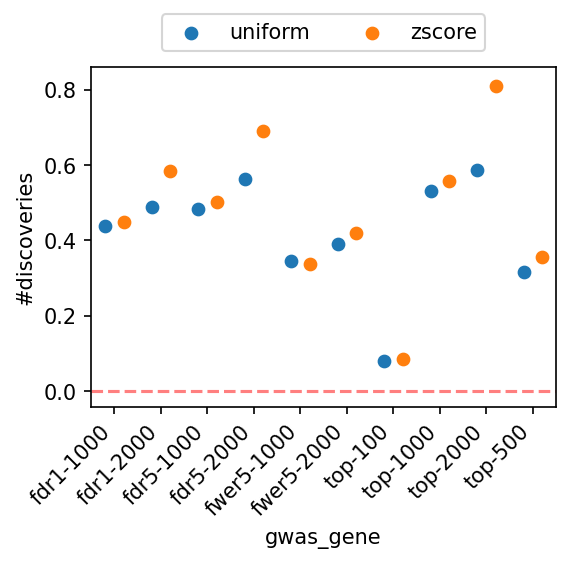

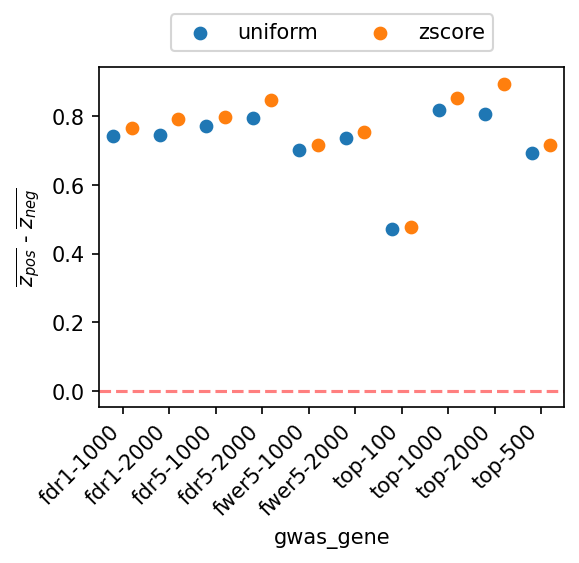

In [12]:
for y in ["tstats", "n_discovery", "meanshift"]:
    df_tmp = df_plot[df_plot.sc_weight == "vs"].drop(columns=["sc_weight"])
    df_tmp["gwas_gene"] = df_tmp["gwas_weight"].apply(lambda x: x.rsplit("-", 1)[0])
    df_tmp["gwas_gene_weight"] = df_tmp["gwas_weight"].apply(
        lambda x: x.rsplit("-", 1)[1]
    )

    fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
    sns.pointplot(
        data=df_tmp,
        x="gwas_gene",
        y=y,
        hue="gwas_gene_weight",
        errwidth=0.75,
        join=False,
        scale=0.75,
        dodge=0.4,
        ax=ax,
    )
    ax.legend(loc="center", bbox_to_anchor=[0.5, 1.1], ncol=2)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    if y == "tstats":
        ax.set_ylabel("t-stats")
    elif y == "n_discovery":
        ax.set_ylabel("#discoveries")
    elif y == "meanshift":
        ax.set_ylabel("$\\overline{z_{pos}}$ - $\\overline{z_{neg}}$")
    else:
        raise NotImplementedError
    ax.axhline(y=0, ls="--", color="red", alpha=0.5)